In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]



In [4]:
# Data input
#1st element Cost
#2nd element Environment
#3rd element Reliability

A=[90000,20,100] 
B=[110000, 70, 0]
C=[ 170000, 100, 90]
D=[60000 ,0 ,50]

In [48]:
data= {"A1":A,"A2":B,"A3":C,"A4":D}
NameArr=[]
EnArr=[]
CostArr=[]
RelArr=[]

#Get Columns
for dt in data:
    CostArr.append(data[dt][0])
    EnArr.append(data[dt][1])
    RelArr.append(data[dt][2])
    NameArr.append(dt)

# Create First Matrix for current situation
rdytoDF= {"Cost":CostArr,"Environmental":EnArr,"Reliability":RelArr}
#columns are merged
df = pd.DataFrame(rdytoDF,columns=[ 'Cost',  'Environmental',"Reliability"])

#Row names changed
df.rename(index={0:"A1",1:"A2",2:"A3",3:"A4"}, inplace=True)
df

,Cost,Environmental,Reliability
A1,90000,20,100
A2,110000,70,0
A3,170000,100,90
A4,60000,0,50


<function matplotlib.pyplot.show>

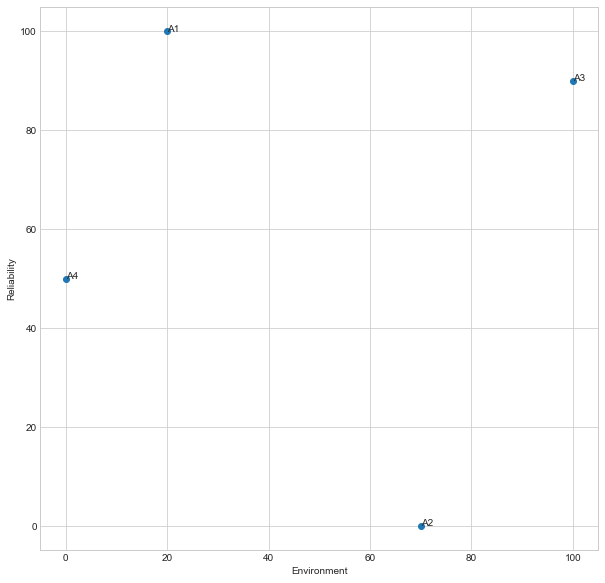

In [47]:
#Plot Functions
plt.figure(figsize=(10,10))

plt.xlabel("Environment")
plt.ylabel("Reliability")

plt.scatter( df["Environmental"],df["Reliability"])

for i, txt in enumerate(NameArr):
    plt.annotate(txt, (df["Environmental"][i], df["Reliability"][i]))
    
plt.show

In [162]:
weightsAnal=(30/100,70/100)
weightedEn=[]
weightedRel=[]
sumEn=0.0
sumRel=0.0

for item in EnArr:
    weightedEn.append(item*weightsAnal[0])
for item in RelArr:
    weightedRel.append(item*weightsAnal[1])
    sumRel+=item*weightsAnal[1]

### PERFORMANCE MATRIX


# Create First Matrix for current situation
rdytoDF= {"Cost":CostArr,"W/Environmental":weightedEn,"W/Reliability":weightedRel}
#columns are merged
resultdf = pd.DataFrame(rdytoDF,columns=[ 'Cost',  'W/Environmental',"W/Reliability"])
#Row names changed
resultdf.rename(index={0:"A1",1:"A2",2:"A3",3:"A4"}, inplace=True)

## In this Question WE ASSUME COST IS NOT INCLUDED IN RATING TECHNIQUE
## CODE FOR INCLUDING COST AS WELL

# Calculate Summation Column to the end
summation=[]
for index, row in resultdf.iterrows():
    summation.append(row['W/Environmental']+row["W/Reliability"])
# Add Summation Column to the DF
resultdf["Summation"]=summation
resultdf

,Cost,W/Environmental,W/Reliability,Summation
A1,90000,6.0,70.0,76.0
A2,110000,21.0,0.0,21.0
A3,170000,30.0,63.0,93.0
A4,60000,0.0,35.0,35.0


In [164]:
#### SCORE FUNCTION
#Cool list comprehension =)
#weightedList=[list(a) for a in zip(NameArr,[x+y for x,y in zip(weightedEn,weightedRel)])]

weightedList=[list(a) for a in zip(NameArr,CostArr,summation)]
rankedDF=pd.DataFrame(sorted(weightedList, key=lambda weight: weight[2],reverse=True), columns=["Alternatives","Cost","Score"])
print(rankedDF)

  Alternatives    Cost  Score
0           A3  170000   93.0
1           A1   90000   76.0
2           A4   60000   35.0
3           A2  110000   21.0


<function matplotlib.pyplot.show>

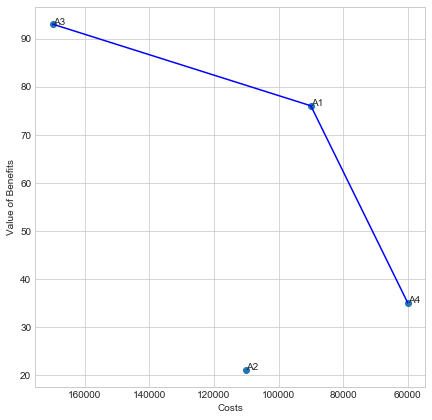

In [169]:
## Efficient Frontier

#Plot Functions
plt.figure(figsize=(7,7))
plt.xlabel("Costs")
plt.ylabel("Value of Benefits")

plt.scatter( rankedDF["Cost"],rankedDF["Score"])


# FUNCTION THIS !
#plt.plot([x1,x2]
plt.plot([rankedDF.ix[0][1],rankedDF.ix[1][1]],[rankedDF.ix[0][2],rankedDF.ix[1][2]],color="Blue")
plt.plot([rankedDF.ix[2][1],rankedDF.ix[1][1]],[rankedDF.ix[2][2],rankedDF.ix[1][2]],color="Blue")



for i, txt in enumerate(rankedDF["Alternatives"]):
    plt.annotate(txt, (rankedDF["Cost"][i], rankedDF["Score"][i]))

    
plt.gca().invert_xaxis()
plt.show

In [184]:
#Client view Environment point
#120.000 for 0 to 100
CviewEn= 120000/100*100

CviewEn

120000.0

In [181]:
df

,Cost,Environmental,Reliability
A1,90000,20,100
A2,110000,70,0
A3,170000,100,90
A4,60000,0,50


In [182]:
170-60

110